In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [36]:
pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present_SI.csv')

/Users/hyejinkim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.drop(['Agency', 'Due Date', 'Facility Type', 'Cross Street 1', 'Cross Street 2', 
           'Intersection Street 1', 'Intersection Street 2', 'Community Board', 'BBL', 
           'Open Data Channel Type', 'Park Facility Name', 'Park Borough', 'Vehicle Type', 
           'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction',
           'Road Ramp', 'Bridge Highway Segment'], axis = 1, inplace=True)

In [6]:
data = data[data['Borough'] != 'Unspecified']

In [7]:
data['Year'] = pd.DatetimeIndex(data['Created Date']).year
data['Month'] = pd.DatetimeIndex(data['Created Date']).month
data['Year_Month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [8]:
data.loc[data['Complaint Type'] == 'Dirty Condition', 'Complaint Type'] = 'Dirty Conditions'

In [9]:
# Descriptors to drop within dirty conditions category

dirty_conditions_drop = ['Broken Glass', 'Debris from Car Accident', 'Dirt or Gravel', 'Dog Waste', 
                         'E15 Illegal Postering', 'E4 18" Law', 'E8 Canine Violation', 'Poster or Sign', 'Syringes']

In [10]:
# Dropped the above
data = data.drop(data[data.Descriptor.isin(dirty_conditions_drop)].index)

#749006 rows left

In [11]:
food_establishment_keep = ['No Permit or License', 'Permit/License/Certificate', 'Rodents/Insects/Garbage']

In [12]:
data_food = data[data['Descriptor'].isin(food_establishment_keep)]

In [13]:
#remove all Food Establishment

data = data[data['Complaint Type'] != 'Food Establishment'] 

In [14]:
data = pd.concat([data, data_food], axis=0)

In [15]:
#remove the following illegal parking types
illegal_parking_drop = ['Overnight Commercial Storage', 'Detached Trailer', 'Unauthorized Bus Layover']

In [16]:
# Dropped the above
data = data.drop(data[data.Descriptor.isin(illegal_parking_drop)].index)

In [17]:
data

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Resolution Action Updated Date,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,Year,Month,Year_Month
0,20065513,03/19/2011 10:59:00 AM,03/22/2011 12:00:00 PM,A - Staten Island,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,10306.0,RICHMOND ROAD,RICHMOND ROAD,...,03/22/2011 12:00:00 PM,STATEN ISLAND,946688.0,148110.0,40.573124,-74.135208,"(40.5731241316492, -74.1352082901508)",2011,3,2011-03-01
1,20070150,03/20/2011 03:31:00 PM,03/25/2011 12:00:00 PM,P - Brooklyn and Staten Island,Dirty Conditions,E12 Illegal Dumping Surveillance,Sidewalk,10306.0,331 HUNTER AVENUE,HUNTER AVENUE,...,03/25/2011 12:00:00 PM,STATEN ISLAND,956988.0,150074.0,40.578553,-74.098140,"(40.57855257723265, -74.09814033602167)",2011,3,2011-03-01
2,45830228,03/14/2020 09:55:28 PM,03/14/2020 11:30:07 PM,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10304.0,449 WESER AVENUE,WESER AVENUE,...,03/14/2020 11:30:13 PM,STATEN ISLAND,960259.0,159755.0,40.605134,-74.086399,"(40.60513442383097, -74.08639946184654)",2020,3,2020-03-01
3,20069524,03/20/2011 03:43:00 PM,03/22/2011 12:00:00 PM,A - Staten Island,Dirty Conditions,E3 Dirty Sidewalk,Sidewalk,10314.0,YUKON AVENUE,YUKON AVENUE,...,03/22/2011 12:00:00 PM,STATEN ISLAND,938413.0,148715.0,40.574746,-74.164999,"(40.57474581506658, -74.16499904342676)",2011,3,2011-03-01
5,20069527,03/20/2011 08:06:00 PM,03/22/2011 12:00:00 PM,A - Staten Island,Dirty Conditions,E3A Dirty Area/Alleyway,Lot,10304.0,1 CHESTNUT STREET,CHESTNUT STREET,...,03/22/2011 12:00:00 PM,STATEN ISLAND,960477.0,165303.0,40.620363,-74.085634,"(40.6203631204647, -74.08563390517311)",2011,3,2011-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163813,42091285,03/30/2019 12:23:48 PM,05/30/2019 06:11:12 AM,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,10306.0,2481 RICHMOND ROAD,RICHMOND ROAD,...,05/30/2019 06:11:12 AM,STATEN ISLAND,950657.0,148930.0,40.575391,-74.120926,"(40.57539079572836, -74.1209255595297)",2019,3,2019-03-01
163824,42092372,03/30/2019 06:01:38 PM,05/30/2019 06:11:14 AM,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,10305.0,1661 HYLAN BOULEVARD,HYLAN BOULEVARD,...,05/30/2019 06:11:14 AM,STATEN ISLAND,959065.0,153570.0,40.588155,-74.090676,"(40.58815454275578, -74.09067638739472)",2019,3,2019-03-01
163858,42096438,03/30/2019 10:33:25 AM,05/30/2019 06:11:12 AM,Department of Health and Mental Hygiene,Food Establishment,Permit/License/Certificate,Residence,10304.0,25 MARY STREET,MARY STREET,...,05/30/2019 06:11:12 AM,STATEN ISLAND,960333.0,162406.0,40.612411,-74.086142,"(40.61241107184313, -74.0861423522933)",2019,3,2019-03-01
164148,42135473,04/04/2019 07:26:59 AM,06/04/2019 06:12:33 AM,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Other (Explain Below),10305.0,1565 HYLAN BOULEVARD,HYLAN BOULEVARD,...,06/04/2019 06:12:33 AM,STATEN ISLAND,959639.0,154419.0,40.590486,-74.088613,"(40.590486489244036, -74.08861284426779)",2019,4,2019-04-01


In [30]:
df_2010_2021.to_csv('311_Service_Requests_from_2010_to_Present_SI_2.csv')

In [18]:
# Drop 2022 data for yearly graph
df_2010_2021 = data.drop(data[data.Year_Month == '2022-02-01'].index)

In [19]:
df_2010_2021 = df_2010_2021.groupby('Year_Month')[['Unique Key']].count()

In [20]:
df_2010_2021.rename(columns={'Unique Key': 'Total Complaints'}, inplace=True)

In [21]:
df_2010_2021.reset_index(inplace=True)

In [22]:
l = [x[:7] for x in df_2010_2021['Year_Month'].astype(str)]

In [24]:
import re
xlabelsnew = []
for i in l:
    if re.search('....-01', i) != None:
        xlabelsnew.append(i)
    else:
        xlabelsnew.append(' ')

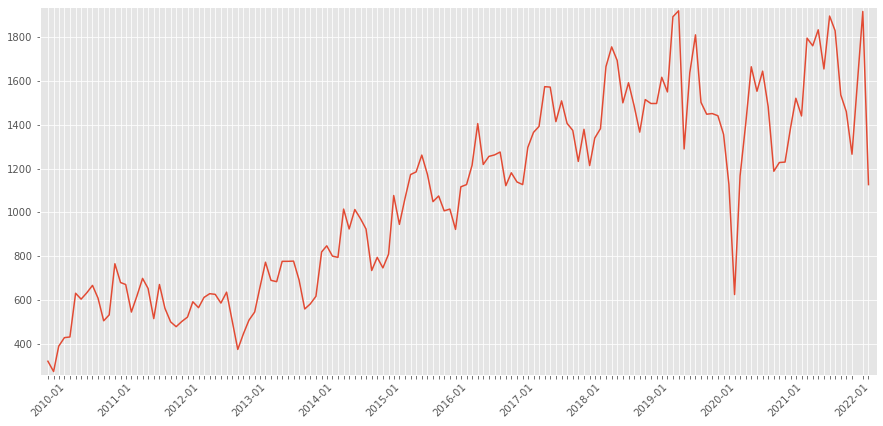

In [28]:
x = df_2010_2021['Year_Month']
y = df_2010_2021['Total Complaints']
labels = xlabelsnew

plt.plot(x, y)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.rcParams["figure.figsize"] = (10, 5)

plt.xticks(x, labels, rotation='vertical')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.01)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

In [33]:
si = [x for x in df_2010_2021['Total Complaints']]

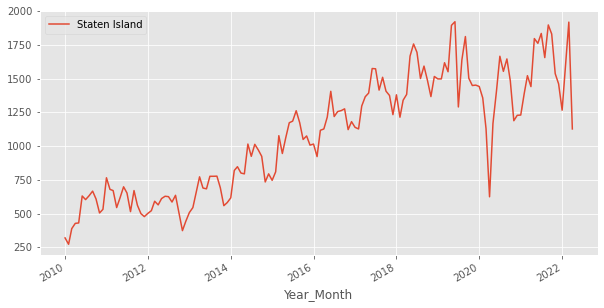

In [34]:
df = pd.DataFrame({
   'Staten Island': si
   }, index=df_2010_2021['Year_Month'])
lines = df.plot.line()

In [37]:
df_2010_2021

,Year_Month,Total Complaints
0,2010-01-01,319
1,2010-02-01,272
2,2010-03-01,388
3,2010-04-01,427
4,2010-05-01,430
5,2010-06-01,630
6,2010-07-01,603
7,2010-08-01,632
8,2010-09-01,666
9,2010-10-01,608
